In [116]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point
from matplotlib.lines import Line2D

In [3]:
data311 = pd.read_csv("data311_final.csv")

In [4]:
datatree = pd.read_csv("ftreedf_final.csv")

In [5]:
datarent = pd.read_csv("zillowdf_final.csv")

In [6]:
gdf = gpd.read_file("C:/Users/Yining Zhu/OneDrive/桌面/4004pj/nyc_zipcodes/nyc_zipcodes.shp")
target_srid = 4326
gdf = gdf.to_crs(epsg=target_srid)
gdf2 = gdf[['ZIPCODE','geometry']].crs
fgdf = gdf[['ZIPCODE','geometry']]
fgdf.columns = ['zipcode','geom']
datazipcode = fgdf

visualization 1

In [150]:
data311_1 = data311[(data311.created_date>='2022-10-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]

In [151]:
types = data311_1['complaint_id'].groupby(data311_1.complaint_type).count().sort_values(ascending=False).iloc[:3].index
data311_1 = data311_1.set_index('complaint_type').loc[types]
data311_1 = data311_1.reset_index()

In [152]:
data311_1 = data311_1['complaint_type'].groupby([data311_1.created_date.apply(lambda x:x[:10]),data311_1.complaint_type]).count()


In [162]:
data311_1.name = 'count'
data311_1 = data311_1.reset_index().set_index('complaint_type')

In [163]:
data311_1

,created_date,count
complaint_type,,
HEAT/HOT WATER,2022-10-01,498
Illegal Parking,2022-10-01,991
Noise - Residential,2022-10-01,1153
HEAT/HOT WATER,2022-10-02,866
Illegal Parking,2022-10-02,990
...,...,...
Illegal Parking,2023-09-29,874
Noise - Residential,2023-09-29,709
HEAT/HOT WATER,2023-09-30,342


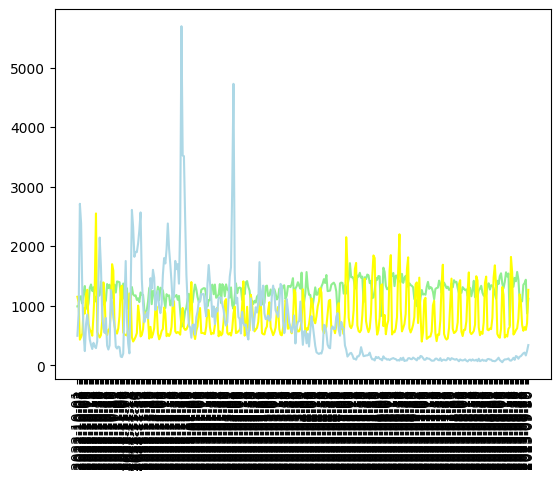

In [171]:
plt.plot(data311_1.loc[types[0]].iloc[:,0],data311_1.loc[types[0]].iloc[:,1],color='lightgreen')
plt.plot(data311_1.loc[types[1]].iloc[:,0],data311_1.loc[types[1]].iloc[:,1],color='yellow')
plt.plot(data311_1.loc[types[2]].iloc[:,0],data311_1.loc[types[2]].iloc[:,1],color='lightblue')
plt.tick_params(axis='x',rotation=90)

visualization 2

In [36]:
data311_2 = data311[(data311.created_date>='2018-10-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]

In [37]:
data311_2 = data311_2[data311_2.zipcode==10027]
data311_2 = data311_2['complaint_id'].groupby(data311_2['complaint_type']).count()
data311_2 = data311_2.sort_values(ascending=False).iloc[:10]

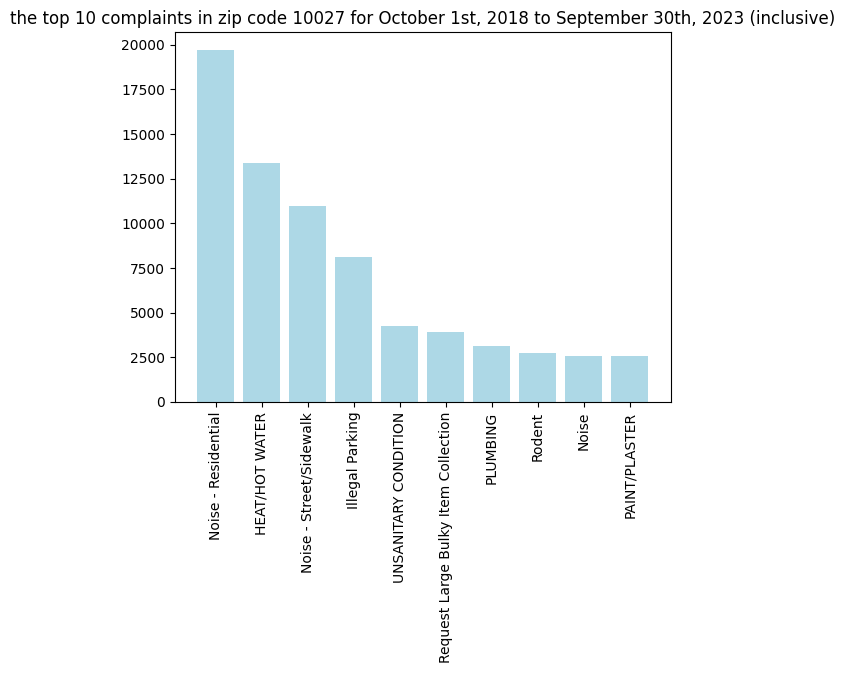

In [56]:
plt.bar(data311_2.index,data311_2,color='lightblue')
plt.tick_params(axis='x',rotation=90)
plt.title('the top 10 complaints in zip code 10027 for October 1st, 2018 to September 30th, 2023 (inclusive)')
plt.show()

visualization 3

In [86]:
data311_3 = data311[(data311.created_date>='2015-01-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]
data311_3 = data311_3['complaint_id'].groupby(data311_3.zipcode).count()
data311_3 = data311_3.reset_index()
data311_3

,zipcode,complaint_id
0,0,239
1,1,2
2,11,2
3,24,1
4,83,313
...,...,...
1415,600184501,1
1416,601488479,1
1417,617023517,1
1418,752660675,1


In [87]:
datatree_3 = datatree.tree_id.groupby(datatree.zipcode).count()
datatree_3.name = 'num_tree'
datatree_3 = datatree_3.reset_index()
datatree_3

,zipcode,num_tree
0,83,935
1,10001,911
2,10002,2265
3,10003,2025
4,10004,118
...,...,...
186,11691,5718
187,11692,2013
188,11693,1169
189,11694,3572


In [90]:
datarent_3 = datarent
datarent_3 = datarent_3.iloc[:,2:].groupby(datarent['zipcode']).mean()
datarent_3 = datarent_3.mean(axis=1)
datarent_3 = datarent_3.reset_index()
datarent_3.columns = ['zipcode', 'rents']

In [55]:
month_range = data311_3.index.unique()
df = pd.merge(pd.merge(datatree_3,datarent_3.iloc[:,0],left_index=True,right_index=True,how='inner'),data311_3.loc[month_range[0]].set_index('zipcode'),left_index=True,right_index=True,how="inner")

In [91]:
df = pd.merge(datatree_3,datarent_3,left_on='zipcode',right_on='zipcode',how='inner')

In [92]:
df = pd.merge(df,data311_3,left_on='zipcode',right_on='zipcode',how="inner")

In [94]:
data = {
    'zip_code': df.zipcode,
    'rent': df.rents,
    'num_trees': df.num_tree,
    'num_complaints': df.complaint_id,
}

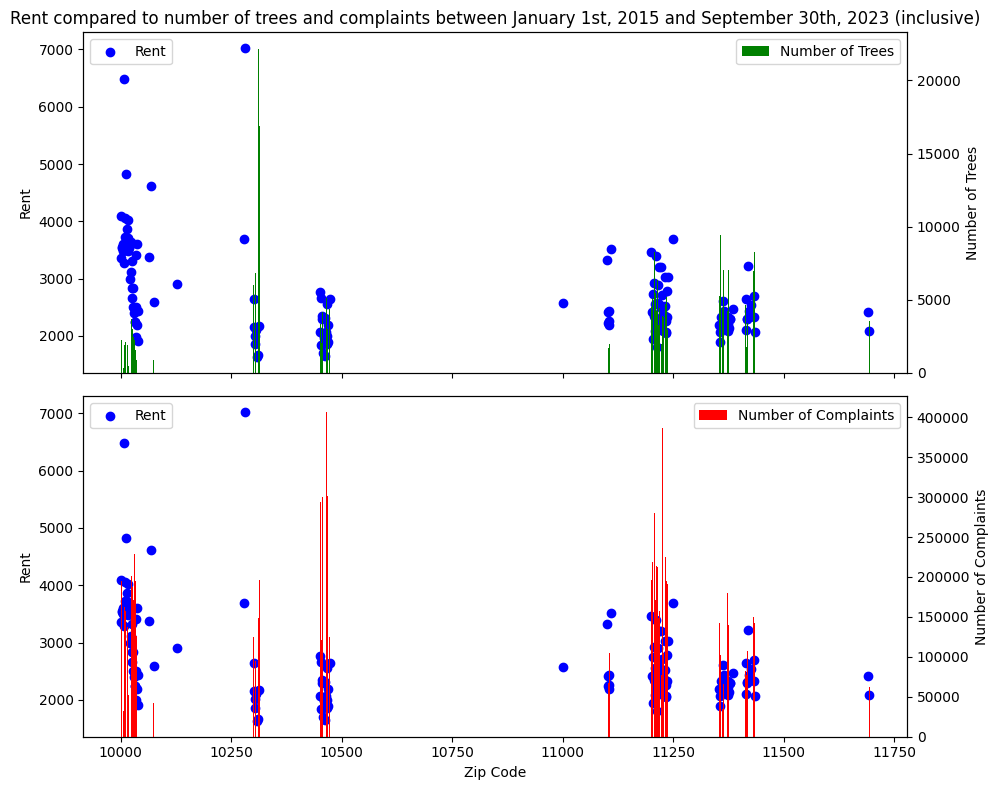

In [103]:
# Sample data (replace this with your actual data)
df = pd.DataFrame(data)

# Create a figure and two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Subplot 1: Rent vs. Number of Trees
ax1.scatter(df['zip_code'], df['rent'], label='Rent', color='blue')
ax1.set_ylabel('Rent')
ax1.legend(loc='upper left')
ax1.set_title('Rent compared to number of trees and complaints between January 1st, 2015 and September 30th, 2023 (inclusive)')
ax1_2 = ax1.twinx()
ax1_2.bar(df['zip_code'], df['num_trees'], label='Number of Trees', color='green')
ax1_2.set_ylabel('Number of Trees')
ax1_2.legend(loc='upper right')

# Subplot 2: Rent vs. Number of Complaints
ax2.scatter(df['zip_code'], df['rent'], label='Rent', color='blue')
ax2.set_xlabel('Zip Code')
ax2.set_ylabel('Rent')
ax2.legend(loc='upper left')

ax2_2 = ax2.twinx()
ax2_2.bar(df['zip_code'], df['num_complaints'], label='Number of Complaints', color='red')
ax2_2.set_ylabel('Number of Complaints')
ax2_2.legend(loc='upper right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.show()

visualization 4

In [18]:
datarent_4 = datarent[['regionid','zipcode','m2023_09']]
data311_4 = data311[(data311.created_date>='2022-10-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]

In [21]:
datarent_4.zipcode

311

In [24]:
datarent_4 = datarent_4['m2023_09'].groupby(datarent_4['zipcode']).mean().reset_index()
data311_4 = data311_4['complaint_id'].groupby(data311_4.zipcode).count().reset_index()

In [9]:
data_4 = pd.merge(datarent_4, data311_4, left_on='zipcode', right_on='zipcode', how='inner')
data_4.rename(columns={'complaint_id':'complaint_num'},inplace=True)

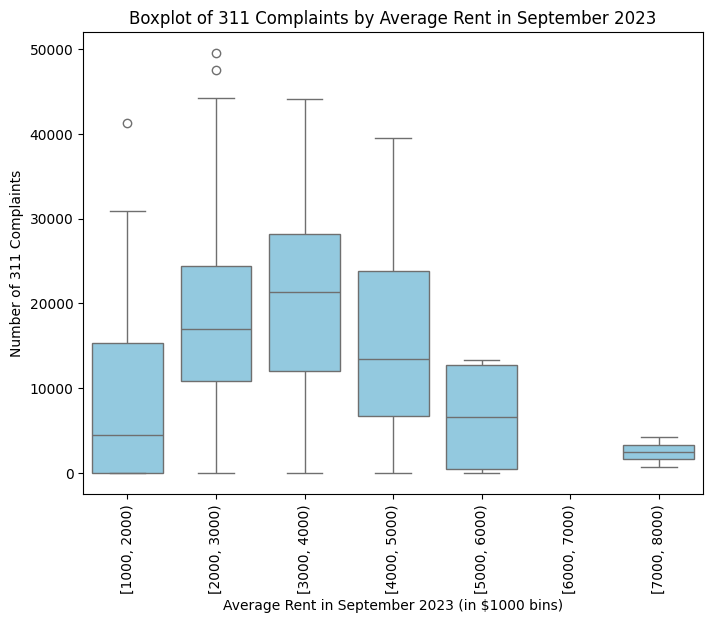

In [51]:
df_large = pd.DataFrame({'AverageRent': data_4.iloc[:,1], '311Complaints': data_4.iloc[:,2], 'ZipCode': data_4.iloc[:,0]})

# Create a new column for bins based on rent
df_large['RentBin'] = pd.cut(df_large['AverageRent'], bins=range(1000, 8001, 1000), right=False)

# Create the boxplot with Zip Code as hue
plt.figure(figsize=(8, 6))
sns.boxplot(x='RentBin', y='311Complaints', data=df_large, color='skyblue')
plt.title('Boxplot of 311 Complaints by Average Rent in September 2023')
plt.tick_params(axis='x',rotation=90)
plt.xlabel('Average Rent in September 2023 (in $1000 bins)')
plt.ylabel('Number of 311 Complaints')
plt.show()

visualization 5

In [59]:
data311_5 = data311[(data311.created_date>='2023-01-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]
data311_5 = data311_5[['complaint_id','latitude','longitude']]

In [120]:
nrows = len(data311_5)
points = gpd.points_from_xy(data311_5.iloc[:,2], data311_5.iloc[:,1])
gdf = gpd.GeoDataFrame({'geometry': points}, crs='EPSG:4326')
gdf_proj = gdf
gdf_proj.geometry = gdf_proj.geometry.to_crs(epsg=3857)

In [137]:
fixed_point = gpd.GeoDataFrame(geometry=[Point(-73.96253174434912, 40.80737875669467)], crs="EPSG:4326")
fixed_point_proj = fixed_point
fixed_point_proj.geometry = fixed_point_proj.geometry.to_crs(epsg=3857)

In [139]:
radius = 1000  # 1 km = 1000 meters
buffered_area = fixed_point_proj.buffer(radius)
points_within_radius = gdf_proj[gdf_proj.within(buffered_area.unary_union)]

In [141]:
end = gdf.loc[points_within_radius.index]
end.geometry = end.geometry.to_crs(epsg=4326)
result = pd.concat([end, gpd.GeoDataFrame(geometry=[Point(-73.96253174434912, 40.80737875669467)], crs="EPSG:4326")], ignore_index=True)
result['type'] = [*['reports 311 incidents' for i in range(len(result)-1)],'fixed point']

Text(0.5, 1.0, 'reported 311 incidents that happened between January 1st, 2023 and September 30th, 2023 (inclusive) within a 1 kilometer radius of a fixed point')

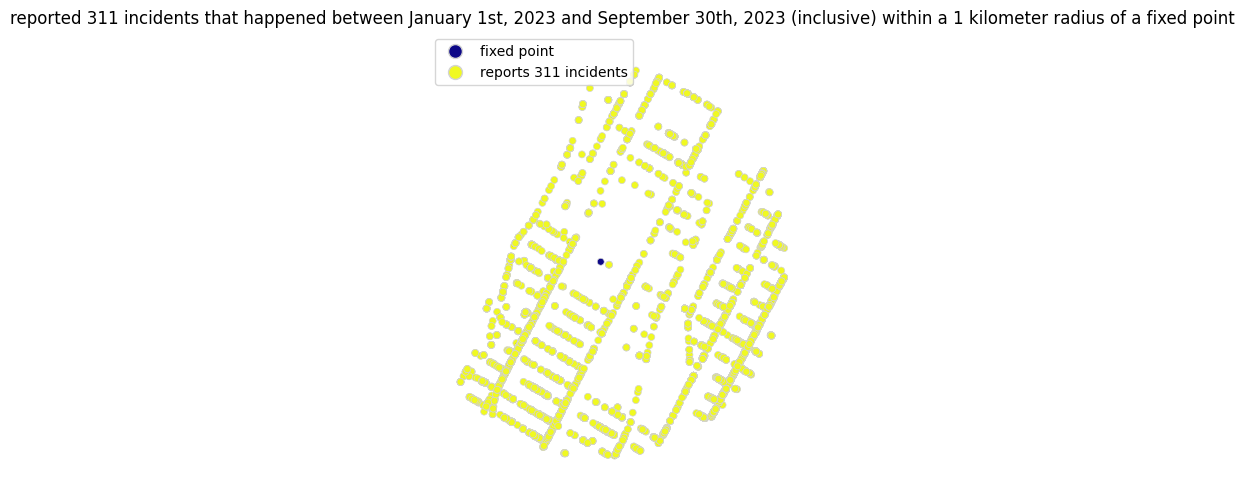

In [212]:
gplt.pointplot(result, projection=gcrs.AlbersEqualArea(), hue='type', cmap='plasma', edgecolor='lightgray', linewidth=0.5, legend=True)
plt.title('reported 311 incidents that happened between January 1st, 2023 and September 30th, 2023 (inclusive) within a 1 kilometer radius of a fixed point')

Text(0.5, 1.0, 'reported 311 incidents that happened between January 1st, 2023 and September 30th, 2023 (inclusive) within a 1 kilometer radius of a fixed point')

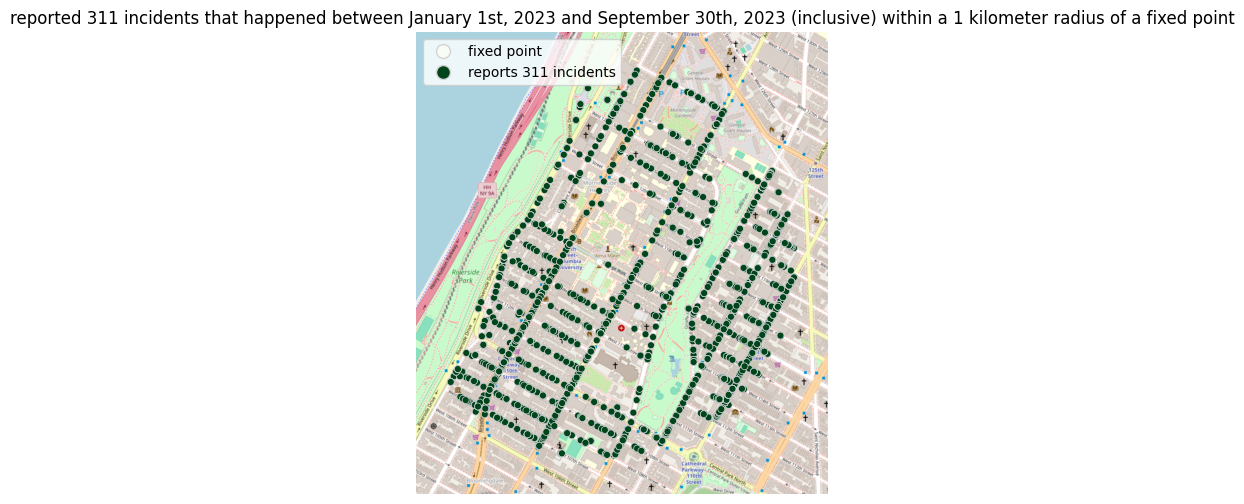

In [211]:
ax = gplt.webmap(result, projection=gcrs.WebMercator())
gplt.pointplot(result, projection=gcrs.AlbersEqualArea(), hue='type', cmap='Greens', edgecolor='lightgray', linewidth=0.5, ax=ax, legend=True)
plt.title('reported 311 incidents that happened between January 1st, 2023 and September 30th, 2023 (inclusive) within a 1 kilometer radius of a fixed point')

visualization 6

In [96]:
data311_6 = data311[(data311.created_date>='2018-10-01T00:00:00.000')&(data311.created_date<'2023-10-01T00:00:00.000')]
data311_6 = data311_6[data311_6['complaint_type']=='New Tree Request']
data311_6 = data311_6[['latitude','longitude']]

In [97]:
datatree_6 = datatree[['latitude','longitude']]

In [106]:
points311 = gpd.points_from_xy(data311_6.iloc[:,1], data311_6.iloc[:,0])
gdf311 = gpd.GeoDataFrame({'geometry': points311}, crs='EPSG:4326')
pointstree = gpd.points_from_xy(datatree_6.iloc[:,1], datatree_6.iloc[:,0])
gdftree = gpd.GeoDataFrame({'geometry': pointstree}, crs='EPSG:4326')

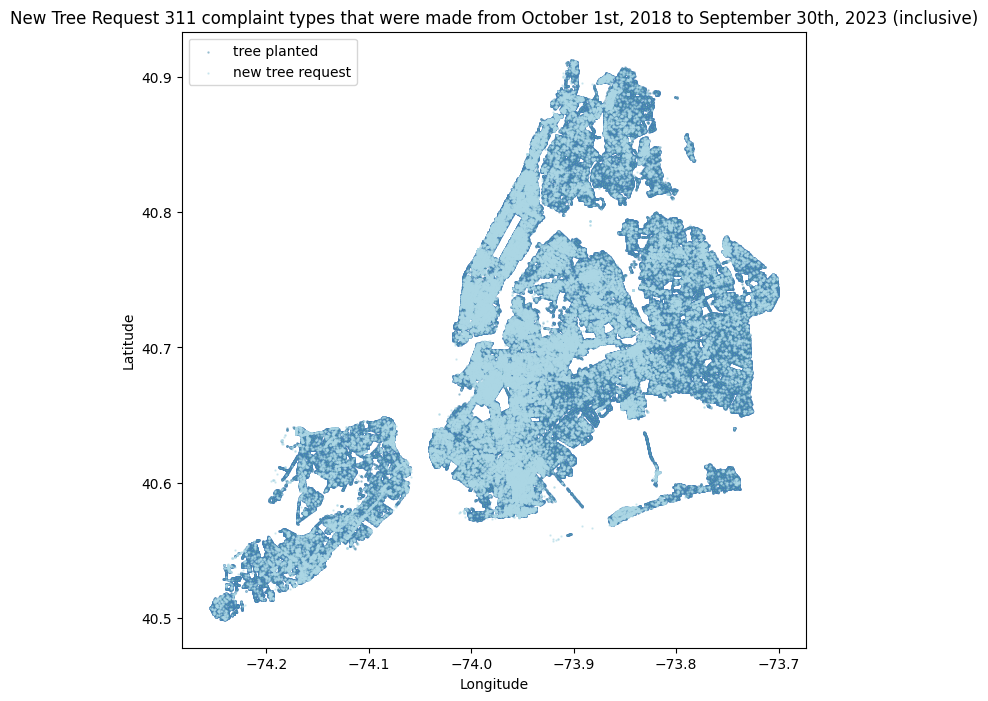

In [119]:
figure1, ax1 = plt.subplots(figsize=(10, 8))
gdftree[~gdftree['geometry'].is_empty].plot(ax=ax1, color='lightgreen', edgecolor='steelblue', alpha=0.5, markersize=0.5, label='tree planted')
gdf311[~gdf311['geometry'].is_empty].plot(ax=ax1, color='lightblue', edgecolor='lightblue', alpha=0.5, markersize=0.5, label='new tree request')

ax1.set_title('New Tree Request 311 complaint types that were made from October 1st, 2018 to September 30th, 2023 (inclusive)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()
plt.show()
